In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import kagglehub

In [ ]:
col_names=['pregnant', 'glucose' , 'bp' , 'skin' , 'insulin','bmi', 'pedigree', 'age', 'label']
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
data=pd.read_csv(path+"/diabetes.csv", header=None,names=col_names,skiprows=1)
print(data.shape)
data.head(5)


(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.dtypes

,0
pregnant,int64
glucose,int64
bp,int64
skin,int64
insulin,int64
bmi,float64
pedigree,float64
age,int64
label,int64


In [ ]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [ ]:
feature_cols= ['pregnant','insulin','age','glucose','bp','bmi','pedigree']
x=data[feature_cols]
y=data['label']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [ ]:
model=LogisticRegression(solver='lbfgs',max_iter=1000)

In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[92 12]
 [19 31]]
Accuracy Score :  0.7987012987012987
Accuracy in Percentage :  79 %


<Axes: >

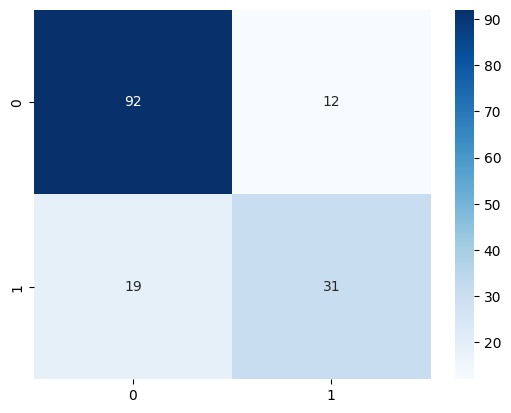

In [ ]:
sn.heatmap(conf_mat, annot=True, cmap='Blues')